In [1]:
import numpy as np
import cv2 as c
import matplotlib.pyplot as plt

In [2]:
from deepface import DeepFace

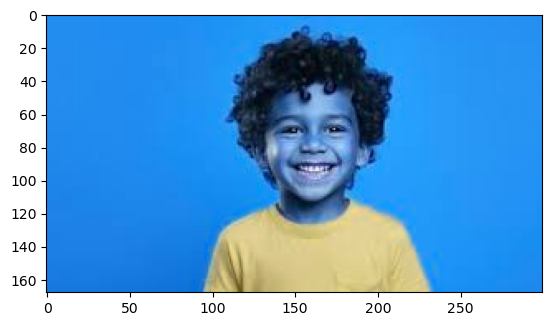

In [3]:
img = c.imread('happyboy.jpeg')
plt.imshow(img)

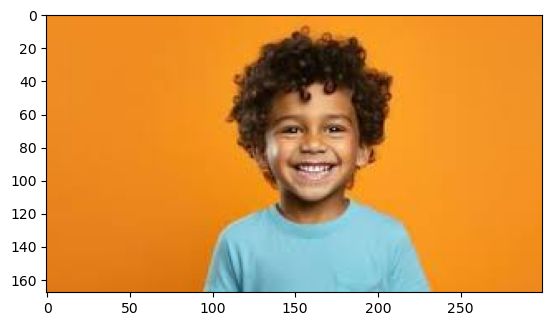

In [4]:
plt.imshow(c.cvtColor(img , c.COLOR_BGR2RGB))

In [5]:
from deepface import DeepFace
print("DeepFace is working!")

DeepFace is working!


In [6]:
pred = DeepFace.analyze(img , actions=['emotion'])

In [7]:
print(pred)

[{'emotion': {'angry': np.float32(2.0614305e-13), 'disgust': np.float32(2.1135856e-22), 'fear': np.float32(1.7392757e-09), 'happy': np.float32(100.0), 'sad': np.float32(2.0219564e-09), 'surprise': np.float32(2.0697741e-14), 'neutral': np.float32(4.6355467e-06)}, 'dominant_emotion': 'happy', 'region': {'x': 127, 'y': 42, 'w': 69, 'h': 69, 'left_eye': None, 'right_eye': None}, 'face_confidence': np.float64(0.93)}]


In [8]:
print(pred[0]['dominant_emotion'])

happy


In [9]:
facecascade = c.CascadeClassifier(c.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [10]:
gray = c.cvtColor(img , c.COLOR_BGR2GRAY)

In [11]:
faces = facecascade.detectMultiScale(gray , 1.1 , 4)

for (x,y,w,h) in faces:
    c.rectangle(img , (x,y) , (x+w , y+h),color=(0,255,0) , thickness=2)

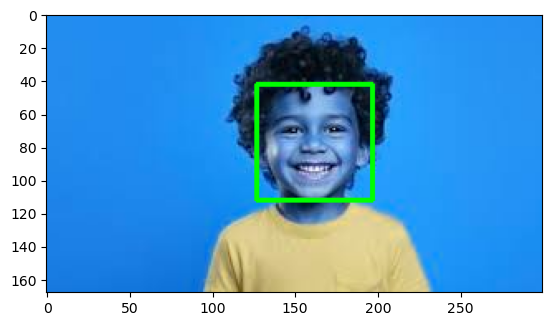

In [12]:
plt.imshow(img)

In [17]:
import cv2 as c
from deepface import DeepFace

facecascade = c.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = c.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = c.cvtColor(frame, c.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray, 1.1, 4)
    try:
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        dominant_emotion = result[0]['dominant_emotion']
    except:
        dominant_emotion = "N/A"


    for (x, y, w, h) in faces:
        c.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        c.putText(frame, dominant_emotion, (x, y + h + 30),
                  c.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    c.imshow("Original Video", frame)
    if c.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
c.destroyAllWindows()
